In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import geopandas as gpd
import re
import os
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.dates import AutoDateFormatter, AutoDateLocator, ConciseDateConverter, ConciseDateFormatter

In [1]:
dir = 'N:/isipd/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/tides/'

In [18]:
tides = pd.read_csv(dir + '/6485-25-NOV-2015_slev.csv', skiprows=7, index_col=False)

tides["Obs_date"] = pd.to_datetime(tides['Obs_date'])
mean = tides["SLEV(metres)"].mean()
mean

0.5659235919008725

In [31]:
tides = tides.sort_values(by="Obs_date")

# Column with tide levels
tide_column = 'SLEV(metres)'

# Add a 'Cycle' identifier (based on peaks and troughs of tide data)
tides['Cycle'] = ((tides[tide_column].diff() > 0) != (tides[tide_column].diff().shift(-1) > 0)).cumsum()

# Calculate tidal range per cycle
tidal_ranges = tides.groupby('Cycle').agg(
    High_Tide=(tide_column, 'max'),
    Low_Tide=(tide_column, 'min')
)
tidal_ranges['Tidal_Range'] = tidal_ranges['High_Tide'] - tidal_ranges['Low_Tide']

# Reset index for clarity
tidal_ranges = tidal_ranges.reset_index()

# Save the tidal ranges to a CSV file (optional)
#output_file = dir + '/tidal_ranges.csv'
#tidal_ranges.to_csv(output_file, index=False)

mean_range = tidal_ranges['Tidal_Range'].mean()
max_range = tidal_ranges['Tidal_Range'].mean()
max_range

0.25017166160849774

C:\Users\mealiy001\AppData\Local\Temp\ipykernel_58452\2407784458.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


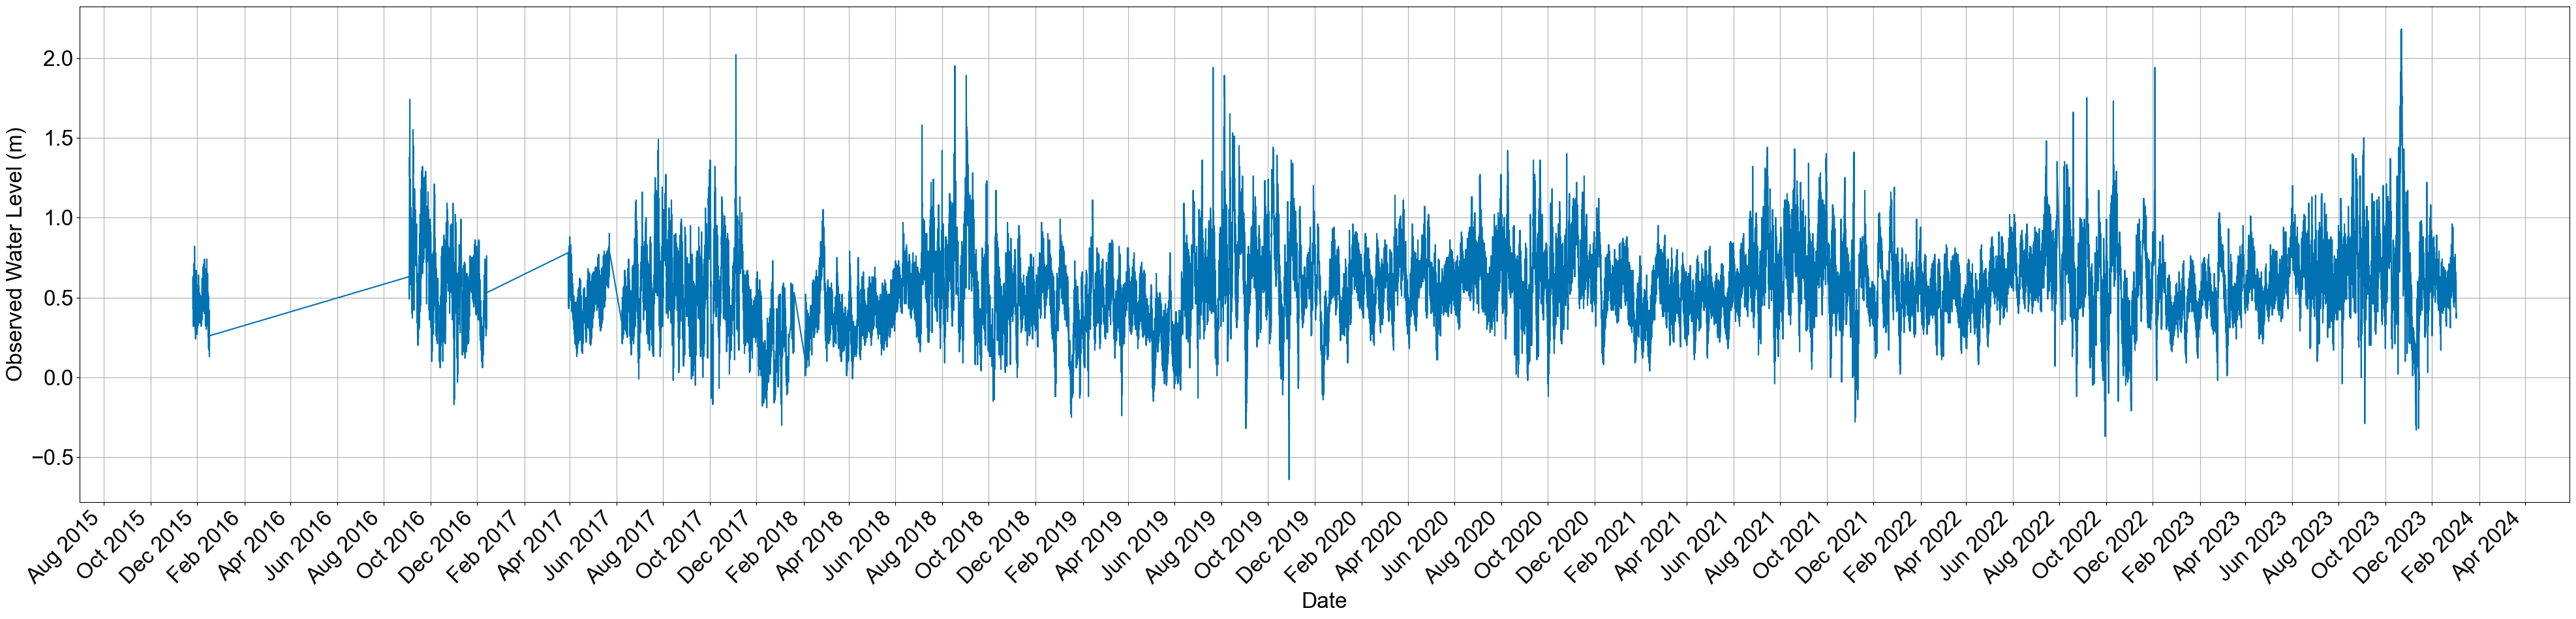

In [17]:
from matplotlib.dates import AutoDateFormatter, AutoDateLocator, ConciseDateConverter, ConciseDateFormatter


plt.figure(figsize=(40, 10))
plt.rcParams['font.size'] = 24
plt.rcParams['font.family'] = 'Arial'
plt.style.use('seaborn-v0_8-colorblind')


plt.plot(tides['Obs_date'], tides['SLEV(metres)'], linestyle='-')

# Get the current axes and set locators and formatters
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%b %Y"))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
# Customize the plot
plt.xlabel('Date')
plt.ylabel('Observed Water Level (m)')
plt.grid(True)


plt.tight_layout()
plt.show()